In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
frames=np.load("outfile_x.npy")
y_train=np.load("outfile_y.npy")

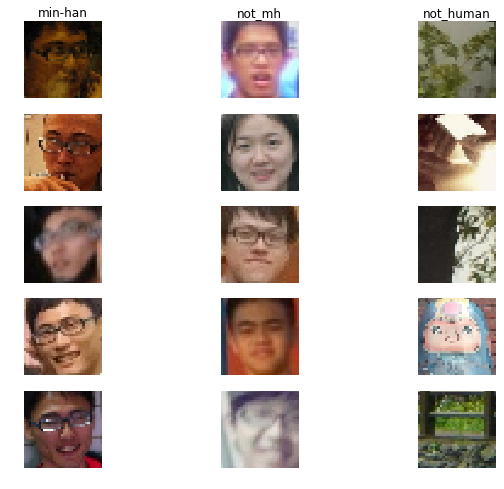

In [3]:
classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(frames[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [4]:
arr = np.arange(len(frames))
np.random.shuffle(arr)
x_train=frames[arr]
y_train=y_train[arr].astype('uint8')

x_train_temp = np.empty((x_train.shape[0],x_train.shape[3],x_train.shape[1],x_train.shape[2]))
print x_train.shape[0]
for j in range(x_train.shape[0]):
    for i in range(x_train.shape[3]):
        x_train_temp[j,i,:,:]=x_train[j,:,:,i]
x_train=x_train_temp

data={
  'X_train': x_train[:int(len(x_train)*0.8)],
  'y_train': y_train[:int(len(x_train)*0.8)],
  'X_val': x_train[int(len(x_train)*0.8):],
  'y_val': y_train[int(len(x_train)*0.8):],
}

932


In [5]:
#using models maked in cs231n assignment2
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

In [8]:
#over fitting at small data
from cs231n.classifiers.cnn import *

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-2)

#model = ConvNet(hidden_dims=[32,32,32],dropout=0,use_batchnorm=False,reg=0.001,pool_period=3)

solver = Solver(model, small_data,
                num_epochs=12, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=10)
solver.train()


(Iteration 1 / 12) loss: 2.271246
(Epoch 1 / 12) train acc: 0.640000; val_acc: 0.582888
(Epoch 2 / 12) train acc: 0.640000; val_acc: 0.582888
(Epoch 3 / 12) train acc: 0.700000; val_acc: 0.582888
(Epoch 4 / 12) train acc: 0.740000; val_acc: 0.737968
(Epoch 5 / 12) train acc: 0.820000; val_acc: 0.679144
(Epoch 6 / 12) train acc: 0.940000; val_acc: 0.759358
(Epoch 7 / 12) train acc: 0.860000; val_acc: 0.711230
(Epoch 8 / 12) train acc: 0.860000; val_acc: 0.727273
(Epoch 9 / 12) train acc: 0.920000; val_acc: 0.764706
(Epoch 10 / 12) train acc: 0.960000; val_acc: 0.786096
(Iteration 11 / 12) loss: 0.427600
(Epoch 11 / 12) train acc: 0.900000; val_acc: 0.764706
(Epoch 12 / 12) train acc: 0.920000; val_acc: 0.770053


In [11]:
#model = ConvNet(hidden_dims=[64,64,128,128,256,256,512,512],hidden_dim=[4096,4096,1000],
#                dropout=0.6,use_batchnorm=True,reg=1e-4,pool_period=2)
#model = ConvNet(hidden_dims=[16],hidden_dim=[15],
#                dropout=0.1,use_batchnorm=False,reg=0.5,pool_period=2)
model = ConvNet(hidden_dims=[64,128,256],hidden_dim=[1024,500],
                dropout=0.6,use_batchnorm=False,reg=1e-4,pool_period=1)
solver = Solver(model, data,
                num_epochs=30, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=30)

(Iteration 1 / 420) loss: 2.319334
(Epoch 0 / 30) train acc: 0.561074; val_acc: 0.582888
(Epoch 1 / 30) train acc: 0.561074; val_acc: 0.582888
(Epoch 2 / 30) train acc: 0.561074; val_acc: 0.582888
(Iteration 31 / 420) loss: 0.960540
(Epoch 3 / 30) train acc: 0.702013; val_acc: 0.705882
(Epoch 4 / 30) train acc: 0.710067; val_acc: 0.780749
(Iteration 61 / 420) loss: 0.950793
(Epoch 5 / 30) train acc: 0.735570; val_acc: 0.754011
(Epoch 6 / 30) train acc: 0.573154; val_acc: 0.572193
(Iteration 91 / 420) loss: 0.797000
(Epoch 7 / 30) train acc: 0.703356; val_acc: 0.711230
(Epoch 8 / 30) train acc: 0.732886; val_acc: 0.748663
(Iteration 121 / 420) loss: 0.532349
(Epoch 9 / 30) train acc: 0.526174; val_acc: 0.491979
(Epoch 10 / 30) train acc: 0.656376; val_acc: 0.647059
(Iteration 151 / 420) loss: 0.361007
(Epoch 11 / 30) train acc: 0.742282; val_acc: 0.732620
(Epoch 12 / 30) train acc: 0.762416; val_acc: 0.786096
(Iteration 181 / 420) loss: 0.787080
(Epoch 13 / 30) train acc: 0.645638; val_

In [12]:
solver.train()

(Iteration 1 / 420) loss: 0.431472
(Epoch 30 / 30) train acc: 0.879195; val_acc: 0.877005
(Epoch 31 / 30) train acc: 0.867114; val_acc: 0.844920
(Epoch 32 / 30) train acc: 0.888591; val_acc: 0.860963
(Iteration 31 / 420) loss: 0.348787
(Epoch 33 / 30) train acc: 0.828188; val_acc: 0.828877
(Epoch 34 / 30) train acc: 0.828188; val_acc: 0.839572
(Iteration 61 / 420) loss: 0.224346
(Epoch 35 / 30) train acc: 0.867114; val_acc: 0.871658
(Epoch 36 / 30) train acc: 0.869799; val_acc: 0.871658
(Iteration 91 / 420) loss: 0.312619
(Epoch 37 / 30) train acc: 0.825503; val_acc: 0.828877
(Epoch 38 / 30) train acc: 0.891275; val_acc: 0.855615
(Iteration 121 / 420) loss: 0.378372
(Epoch 39 / 30) train acc: 0.864430; val_acc: 0.834225
(Epoch 40 / 30) train acc: 0.864430; val_acc: 0.855615
(Iteration 151 / 420) loss: 0.371835
(Epoch 41 / 30) train acc: 0.877852; val_acc: 0.866310
(Epoch 42 / 30) train acc: 0.888591; val_acc: 0.871658
(Iteration 181 / 420) loss: 0.421718
(Epoch 43 / 30) train acc: 0.90

In [13]:
solver.train()

(Iteration 1 / 420) loss: 0.362572
(Epoch 60 / 30) train acc: 0.892617; val_acc: 0.898396
(Epoch 61 / 30) train acc: 0.887248; val_acc: 0.866310
(Epoch 62 / 30) train acc: 0.853691; val_acc: 0.807487
(Iteration 31 / 420) loss: 0.319406
(Epoch 63 / 30) train acc: 0.897987; val_acc: 0.877005
(Epoch 64 / 30) train acc: 0.863087; val_acc: 0.834225
(Iteration 61 / 420) loss: 0.242863
(Epoch 65 / 30) train acc: 0.895302; val_acc: 0.887701
(Epoch 66 / 30) train acc: 0.908725; val_acc: 0.909091
(Iteration 91 / 420) loss: 0.263888
(Epoch 67 / 30) train acc: 0.897987; val_acc: 0.903743
(Epoch 68 / 30) train acc: 0.915436; val_acc: 0.914439
(Iteration 121 / 420) loss: 0.221190
(Epoch 69 / 30) train acc: 0.902013; val_acc: 0.919786
(Epoch 70 / 30) train acc: 0.864430; val_acc: 0.839572
(Iteration 151 / 420) loss: 0.251651
(Epoch 71 / 30) train acc: 0.880537; val_acc: 0.839572
(Epoch 72 / 30) train acc: 0.888591; val_acc: 0.850267
(Iteration 181 / 420) loss: 0.220632
(Epoch 73 / 30) train acc: 0.89

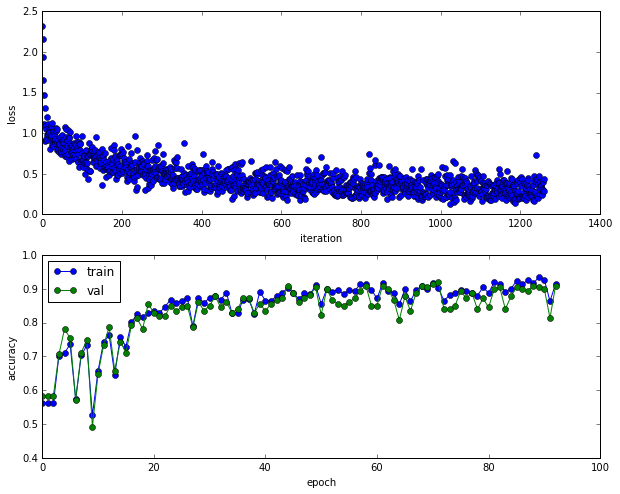

In [14]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [25]:
test_result=model.loss(data['X_val'])

In [34]:
#p
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          99
(not_human, not_human)    59
(min-han, min-han)        14
(mh_not, min-han)          5
(mh_not, not_human)        5
(not_human, mh_not)        2
(min-han, not_human)       1
(min-han, mh_not)          1
(not_human, min-han)       1
dtype: int64


In [36]:
imgTemp=data['X_val'][wrong_idx]

imgTemp.shape

(15, 3, 32, 32)

In [67]:
wrongIdx[0][idx]

63

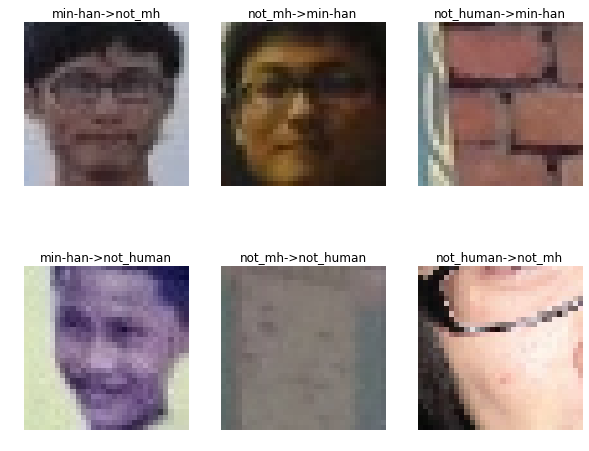

In [70]:
#visualize results
preIdx=np.argmax(test_result, axis=1)
wrongIdx=np.where(preIdx!=data['y_val'])
imgTemp=data['X_val'][wrongIdx]
imgLabel=data['y_val'][wrongIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 2
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgTemp[idx].astype('uint8'))
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[wrongIdx][idx]])
plt.show()

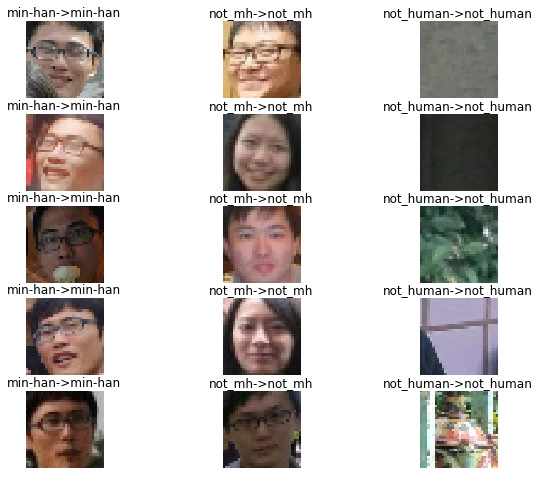

In [74]:
#visualize results
preIdx=np.argmax(test_result, axis=1)
trueIdx=np.where(preIdx==data['y_val'])
imgTemp=data['X_val'][trueIdx]
imgLabel=data['y_val'][trueIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgTemp[idx].astype('uint8'))
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[trueIdx][idx]])
plt.show()